# Titanic Competition on kaggle

In [658]:
import pandas as pd
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [659]:
%pip install xgboost

You should consider upgrading via the 'c:\Users\pwayk\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


<AxesSubplot:>

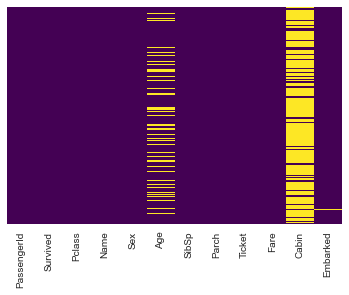

In [660]:
import seaborn as sns
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

For temporary purpose we will append the train and test data after removing the survive column from train data, this will help us preprocess it faster.

In [661]:
train_data.drop(['Name'], axis=1, inplace=True)
train_data.drop(['Cabin'], axis=1, inplace=True)
test_data.drop(['Name'], axis=1, inplace=True)
test_data.drop(['Cabin'], axis=1, inplace=True)

### Checking for null values

<AxesSubplot:>

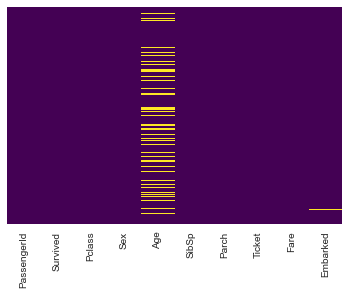

In [662]:
import seaborn as sns
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [663]:
train_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [664]:
import re

def Ticket_Nos(data):
    Ticket_Nos = []
    for i in data['Ticket']:
        temp = (re.sub('[^0-9]', '', i))
        if temp == '':
            temp = '0';
        if len(temp) >3:
            temp = temp[:2]
        if int(temp)>500:
            temp = '50'
        Ticket_Nos.append(temp)

    Ticket_Nos = list(map(int, Ticket_Nos))
    data['Ticket'] = Ticket_Nos 
Ticket_Nos(train_data)
Ticket_Nos(test_data)

In [665]:
# Getting all the details of the data using PDF_REPORT



# profile = profile_report.ProfileReport(test_data) #minimal == true can be used to reduce the output data stream
# profile.to_file(output_file = "test_data.html")

#Insigts from report                              DECISION
1. Age is missing for some rows (263, 20%)    -  Fill with median
2. Cabin is missing for some rows (1014, 77%) - Eliminate
3. Embarked is missing for some rows(2,0.1%)  - Drop those rows
4. Fare is missing for some rows (1,0.1%)     - Drop those rows

In [666]:
#3
train_data.dropna(subset=['Embarked'], inplace=True)
train_data.dropna(subset=['Fare'], inplace=True)
#1
# train_data.fillna(train_data['Age'].median(), axis=1, inplace=True)
# test_data.fillna(test_data['Age'].median(), axis=1, inplace=True)
#2


type(train_data)

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Survived', ylabel='count'>

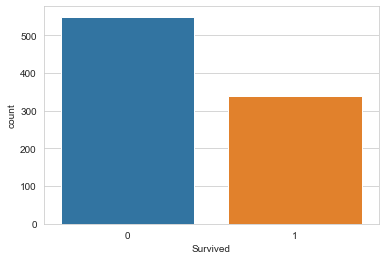

In [667]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data= train_data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

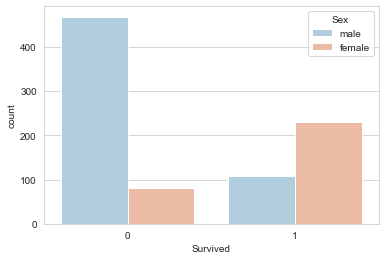

In [668]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data= train_data, hue = 'Sex', palette = 'RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

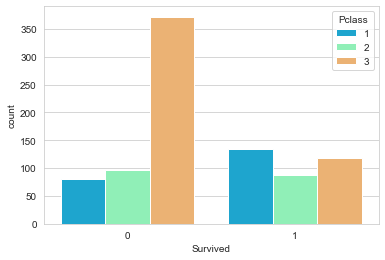

In [669]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data= train_data, hue = 'Pclass', palette = 'rainbow')

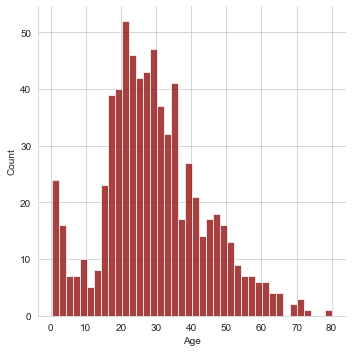

In [670]:
sns.displot(train_data['Age'], kde = False, color = 'darkred', bins = 40)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

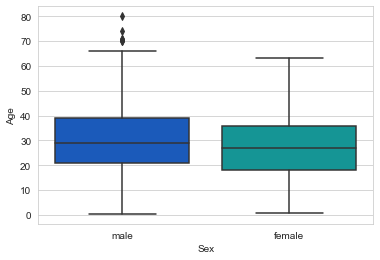

In [671]:

sns.boxplot(x = 'Sex', y = 'Age', data = train_data, palette='winter')

In [672]:
def impute_age(data):
    Age = data['Age']
    sex = data['Sex']
    Pclass = data['Pclass'] 
    if pd.isnull(Age):
        if Pclass == 1:
            if sex == 'male':
                return 37
            else: return 35
        elif Pclass == 2:
            if sex == 'male':
                return 29
            else: return 26
        elif Pclass == 3:
            if sex == 'male':
                return 24
            else: return 22
    else:
        return Age
train_data['Age'] = train_data[['Age', 'Pclass', 'Sex']].apply(impute_age, axis = 1)
test_data['Age'] = test_data[['Age', 'Pclass', 'Sex']].apply(impute_age, axis = 1)
                

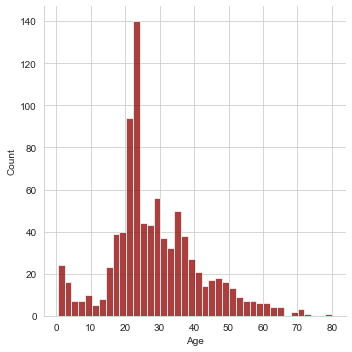

In [673]:
sns.displot(train_data['Age'], kde = False, color = 'darkred', bins = 40)

In [674]:
train_data.shape

(889, 10)

<AxesSubplot:>

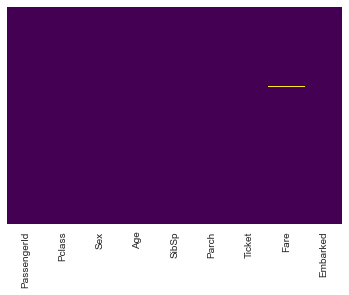

In [675]:
sns.heatmap(test_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [676]:
train_data['Embarked'].shape

(889,)

In [677]:

embarked_fact_train = pd.get_dummies(train_data['Embarked'], prefix='Embarked', drop_first=True)
embarked_fact_test = pd.get_dummies(test_data['Embarked'], prefix='Embarked', drop_first=True)

sex_fact_train = pd.get_dummies(train_data['Sex'], prefix='Sex', drop_first=True)

sex_fact_test= pd.get_dummies(test_data['Sex'], prefix='Sex', drop_first=True)


# pclass_fact_train =  pd.get_dummies(train_data['Pclass'], prefix='Pclass', drop_first=True)
# pclass_fact_test =  pd.get_dummies(test_data['Pclass'], prefix='Pclass', drop_first=True)

len(sex_fact_test)

418

In [678]:
test_data = pd.concat([test_data, embarked_fact_test, sex_fact_test], axis=1)
train_data = pd.concat([train_data, embarked_fact_train, sex_fact_train], axis=1)

In [679]:
train_data.drop(['Embarked', 'Sex'], axis =1, inplace = True)
test_data.drop(['Embarked', 'Sex' ], axis =1, inplace = True)

In [680]:
train_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S,Sex_male
0,1,0,3,22.0,1,0,52,7.2500,0,1,1
1,2,1,1,38.0,1,0,17,71.2833,0,0,0
2,3,1,3,26.0,0,0,23,7.9250,0,1,0
3,4,1,1,35.0,1,0,11,53.1000,0,1,0
4,5,0,3,35.0,0,0,37,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,21,13.0000,0,1,1
887,888,1,1,19.0,0,0,11,30.0000,0,1,0
888,889,0,3,22.0,1,2,66,23.4500,0,1,0
889,890,1,1,26.0,0,0,11,30.0000,0,0,1


In [681]:
train_data['Ticket'].describe()

count    889.000000
mean      28.534308
std       13.162669
min        0.000000
25%       19.000000
50%       28.000000
75%       34.000000
max       95.000000
Name: Ticket, dtype: float64

## Checking the survived column

<AxesSubplot:xlabel='Survived', ylabel='count'>

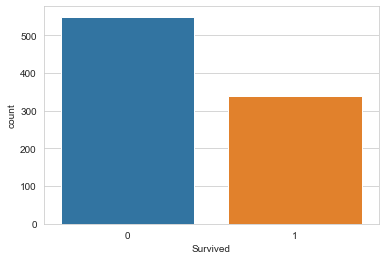

In [682]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data= train_data)

<AxesSubplot:>

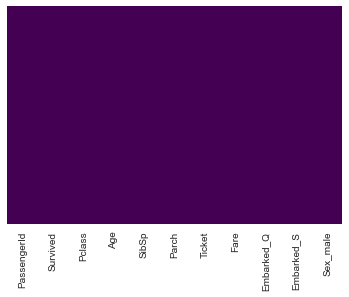

In [683]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Now we will plot Scatter plot to check for outliers

In [684]:
import matplotlib.pyplot as plt

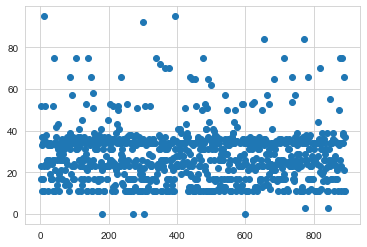

In [685]:
plt.scatter(train_data['PassengerId'], train_data['Ticket'])

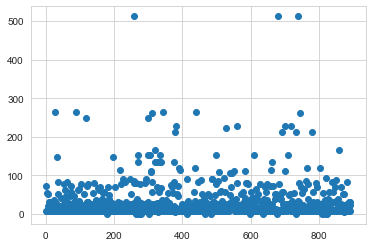

In [686]:

plt.scatter(train_data['PassengerId'], train_data['Fare'])

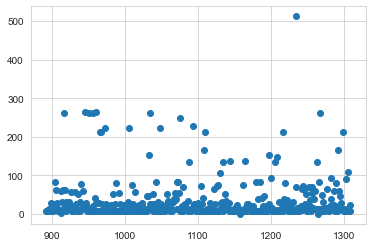

In [687]:
plt.scatter(test_data['PassengerId'], test_data['Fare'])

From the above plot it is clear that the their are some outliers in the data.
especially in the Fare column. So we will remove the outliers from the data.

In [688]:
train_data = train_data[train_data.Fare <400]

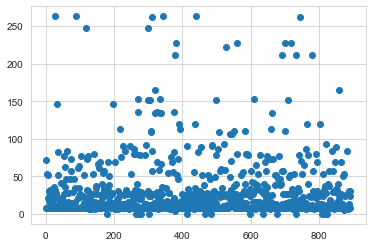

In [689]:
plt.scatter(train_data['PassengerId'], train_data['Fare'])

Hence We have successfully removed outliers in the Fare column.

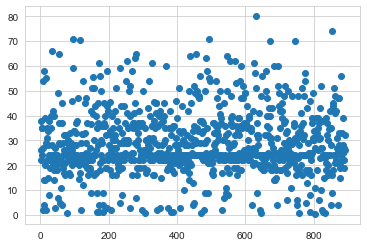

In [690]:
plt.scatter(train_data['PassengerId'], train_data['Age'])

 from the above data it seems like there are almost no outliers in the data.

Now since there are no outliers and the data is one-hot encoded we will scale down the data using standard scaler.

In [691]:
test_data.shape

(418, 10)

In [692]:
from sklearn.preprocessing import StandardScaler
# train_data[['Fare', 'Age']] = StandardScaler().fit_transform(train_data[['Fare', 'Age']])
# test_data[['Fare', 'Age']] = StandardScaler().fit_transform(test_data[['Fare', 'Age']])
# test_data

In [693]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

C:\Users\pwayk\AppData\Local\Temp/ipykernel_18880/4240509083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1


In [694]:
train_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)
test_data.drop(['SibSp', 'Parch'], axis=1, inplace=True)

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [695]:
train_data.shape

(886, 10)

We will create a new column called age_type based upon the age column.
1. Adults  - 0
2. Childern - 1
3. Infants  - 2
4. Old      - 3

In [696]:

def generate_age_type(data):
    Age_type = []
    count = 0
    for age in(data['Age']):
        if age > 18 and age < 60:
            Age_type.append(0)
        elif age <= 18 and age > 5:
            Age_type.append(1)
        elif age <=5:
            Age_type.append(2)
        elif age >= 60:
            Age_type.append(3)
        count += 1

    Age_type = pd.DataFrame(Age_type)
    Age_type.columns = ['Age_type']
  
    return Age_type
    
Age_type_train = generate_age_type(train_data)
Age_type_test =  generate_age_type(test_data)

train_data = train_data.join(Age_type_train)
test_data = test_data.join(Age_type_test)



Now we will genrate a new column called income_type based upon the Fare column.
1. Low      - 0
2. Medium   - 1
3. High     - 2
To know where exactly to split the Fare column we will first see how it is distributed.using the below code.

In [697]:
pd.DataFrame(train_data['Fare']).describe()

,Fare
count,886.000000
mean,30.470611
std,41.155721
min,0.000000
25%,7.895800
50%,14.454200
75%,30.646850
max,263.000000


In [698]:
def generate_fare_type(data):
    Fare_type = []
    for fare in(data['Fare']):
        if fare < 10:
            Fare_type.append(0)
        elif fare >= 10 and fare < 30:
            Fare_type.append(1)
        else:
            Fare_type.append(2)
    Fare_type = pd.DataFrame(Fare_type)
    Fare_type.columns = ['Fare_type']
  
    return Fare_type
Fare_type_train = generate_fare_type(train_data)
Fare_type_test =  generate_fare_type(test_data)

train_data = train_data.join(Fare_type_train)
test_data = test_data.join(Fare_type_test)

WE will have another column called value for money
VFM = Value for Money = Fare/Pclass 


In [699]:
# train_data['Vfm'] = (train_data['Fare'] / train_data['Pclass'])*(train_data['FamilySize'])
# test_data['Vfm'] = (test_data['Fare'] / test_data['Pclass'])*(test_data['FamilySize'])

In [700]:
train_data.drop(['Ticket', 'Fare_type','Age_type'], axis=1, inplace=True)
test_data.drop(['Ticket', 'Fare_type','Age_type'], axis=1, inplace=True)

## Checking for Correlation

In [701]:
# survived = train_data['Survived']
# survived.corr(train_data['Vfm'])


In [702]:
train_data

,PassengerId,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,FamilySize
0,1,0,3,22.0,7.2500,0,1,1,2
1,2,1,1,38.0,71.2833,0,0,0,2
2,3,1,3,26.0,7.9250,0,1,0,1
3,4,1,1,35.0,53.1000,0,1,0,2
4,5,0,3,35.0,8.0500,0,1,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,0,1,1,1
887,888,1,1,19.0,30.0000,0,1,0,1
888,889,0,3,22.0,23.4500,0,1,0,4
889,890,1,1,26.0,30.0000,0,0,1,1


# Building a model

In [703]:
train_data.dropna( inplace=True)

In [704]:
train_y = train_data['Survived']

train_x = train_data.drop(['PassengerId', 'Survived'], axis=1)


In [705]:
#Purposly dropping passengerid
test_ids = test_data['PassengerId']
test_data.drop(['PassengerId'], axis=1, inplace=True)





In [706]:
train_x

,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,FamilySize
0,3,22.0,7.2500,0,1,1,2
1,1,38.0,71.2833,0,0,0,2
2,3,26.0,7.9250,0,1,0,1
3,1,35.0,53.1000,0,1,0,2
4,3,35.0,8.0500,0,1,1,1
...,...,...,...,...,...,...,...
886,2,27.0,13.0000,0,1,1,1
887,1,19.0,30.0000,0,1,0,1
888,3,22.0,23.4500,0,1,0,4
889,1,26.0,30.0000,0,0,1,1


In [707]:
test_data

,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,FamilySize
0,3,34.5,7.8292,1,0,1,1
1,3,47.0,7.0000,0,1,0,2
2,2,62.0,9.6875,1,0,1,1
3,3,27.0,8.6625,0,1,1,1
4,3,22.0,12.2875,0,1,0,3
...,...,...,...,...,...,...,...
413,3,24.0,8.0500,0,1,1,1
414,1,39.0,108.9000,0,0,0,1
415,3,38.5,7.2500,0,1,1,1
416,3,24.0,8.0500,0,1,1,1


In [708]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [709]:
train_x = pd.DataFrame(StandardScaler().fit_transform(train_x))
test_data = pd.DataFrame(StandardScaler().fit_transform(test_data))

In [710]:
train_data

,PassengerId,Survived,Pclass,Age,Fare,Embarked_Q,Embarked_S,Sex_male,FamilySize
0,1,0,3,22.0,7.2500,0,1,1,2
1,2,1,1,38.0,71.2833,0,0,0,2
2,3,1,3,26.0,7.9250,0,1,0,1
3,4,1,1,35.0,53.1000,0,1,0,2
4,5,0,3,35.0,8.0500,0,1,1,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,13.0000,0,1,1,1
887,888,1,1,19.0,30.0000,0,1,0,1
888,889,0,3,22.0,23.4500,0,1,0,4
889,890,1,1,26.0,30.0000,0,0,1,1


In [711]:
test_data.fillna(train_data['Fare'].mean(), inplace=True)

## Checking the gyperparameters for the random forest classifier

n_estimators

In [712]:

model =RandomForestClassifier(n_estimators=85).fit( train_x,  train_y)
y_pred = model.predict(test_data) #Return the predictions

In [713]:
Final_Df = pd.DataFrame({'PassengerId': test_ids, 'Survived': y_pred})

In [714]:
Final_Df.to_csv('submission_RFC_est_85.csv', index=False)

In [715]:
Final_Df.shape

(418, 2)